In [1]:
#Importing Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


import tqdm.notebook as tqdm
from sklearn.preprocessing import MinMaxScaler
from dateutil.parser import parse

#from _future_ import absolute_import, division, print_function, unicode_literals
import matplotlib as mpl
import os

from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA




In [2]:
#mpl. rcParams["figure.figsize"] = (8,6)
#mpl. rcParams["axes.grid"] = False

Numpy for data analysis and pandas for data preprocessing, while the date time was used to convert the date column to date format. plotly was also used for visualisations.

In [3]:
df2= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2012.csv", parse_dates=["Date"])
df3= pd.read_csv(r"Cheltenham Swindon Road Hourly 2013.csv", parse_dates=["Date"])
df4= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2014.csv", parse_dates=["Date"])
df5= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2015.csv", parse_dates=["Date"]) 
df6= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2016.csv", parse_dates=["Date"])
df7= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2017.csv", parse_dates=["Date"])
df8= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2018 .csv", parse_dates=["Date"])
df9= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2019.csv", parse_dates=["Date"])
df10= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2020.csv", parse_dates=["Date"])
df11= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2021.csv", parse_dates=["Date"])


C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/01/2012' in DD/MM/Y

In [4]:
#Concatenate all the dataframes
merged_df = pd.concat([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])


In [5]:
merged_df.head(20)

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,Jan-12,0,4.0,8.0,13.0
1,2012-01-01,NaN,1,4.0,8.0,13.0
2,2012-01-01,NaN,2,4.0,8.0,13.0
3,2012-01-01,NaN,3,2.0,6.0,10.0
4,2012-01-01,NaN,4,1.0,6.0,8.0
5,2012-01-01,NaN,5,1.0,4.0,6.0
6,2012-01-01,NaN,6,1.0,4.0,6.0
7,2012-01-01,NaN,7,2.0,6.0,10.0
8,2012-01-01,NaN,8,2.0,6.0,10.0
9,2012-01-01,NaN,9,2.0,8.0,11.0


In [10]:
df_data = merged_df.copy()
df_data

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,Jan-12,0,4.0,8.0,13.0
1,2012-01-01,NaN,1,4.0,8.0,13.0
2,2012-01-01,NaN,2,4.0,8.0,13.0
3,2012-01-01,NaN,3,2.0,6.0,10.0
4,2012-01-01,NaN,4,1.0,6.0,8.0
...,...,...,...,...,...,...
8755,2021-12-31,NaN,19,11.0,31.0,48.0
8756,2021-12-31,NaN,20,9.0,19.0,33.0
8757,2021-12-31,NaN,21,5.0,13.0,21.0
8758,2021-12-31,NaN,22,2.0,13.0,17.0


In [11]:
fd = df_data.drop(["Nitric Oxide m-3 (20'C 1013mb)"], axis=1, inplace=True)
fd = df_data.drop(["Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)"], axis=1, inplace=True)
fd = df_data.drop(['Month'], axis=1, inplace=True)
fd = df_data.drop(['Hour'], axis=1, inplace=True)

In [13]:
print(df_data)

           Date  Nitrogen Dioxide m-3 (20'C 1013mb)
0    2012-01-01                                 8.0
1    2012-01-01                                 8.0
2    2012-01-01                                 8.0
3    2012-01-01                                 6.0
4    2012-01-01                                 6.0
...         ...                                 ...
8755 2021-12-31                                31.0
8756 2021-12-31                                19.0
8757 2021-12-31                                13.0
8758 2021-12-31                                13.0
8759 2021-12-31                                11.0

[87672 rows x 2 columns]


Date showing year and day
Time series data for Nitrogen dioxide micrograms per

In [7]:
merged_df.dtypes

Date                                              datetime64[ns]
Month                                                     object
Hour                                                       int64
Nitric Oxide m-3 (20'C 1013mb)                           float64
Nitrogen Dioxide m-3 (20'C 1013mb)                       float64
Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)           float64
dtype: object

In [8]:
#Basic statistics
print(merged_df.describe())

               Hour  Nitric Oxide m-3 (20'C 1013mb)  \
count  87672.000000                    85302.000000   
mean      11.500000                       21.534806   
std        6.922226                       28.295883   
min        0.000000                        0.000000   
25%        5.750000                        5.000000   
50%       11.500000                       14.000000   
75%       17.250000                       27.000000   
max       23.000000                      470.000000   

       Nitrogen Dioxide m-3 (20'C 1013mb)  \
count                        85302.000000   
mean                            33.012086   
std                             20.312974   
min                              0.000000   
25%                             17.000000   
50%                             29.000000   
75%                             44.000000   
max                            157.000000   

       Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)  
count                                    8

In [9]:
merged_df[merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"].isnull()]

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
228,2012-10-01,NaN,12,NaN,NaN,NaN
1953,2012-03-22,NaN,9,NaN,NaN,NaN
1954,2012-03-22,NaN,10,NaN,NaN,NaN
1955,2012-03-22,NaN,11,NaN,NaN,NaN
1956,2012-03-22,NaN,12,NaN,NaN,NaN
...,...,...,...,...,...,...
7380,2021-04-11,NaN,12,NaN,NaN,NaN
7416,2021-06-11,NaN,0,NaN,NaN,NaN
7632,2021-11-15,NaN,0,NaN,NaN,NaN
7704,2021-11-18,NaN,0,NaN,NaN,NaN


In [10]:
#def convert_to_date(x):
#  return datetime.strptime(x, '%Y-%m-%d' '%H')

In [11]:
#merged_df= pd.read_csv(r"merged_file.csv", parse_dates = [[ "Date", "Hour"]], date_parser = convert_to_date, keep_date_col=True)

In [12]:
merged_df

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,Jan-12,0,4.0,8.0,13.0
1,2012-01-01,NaN,1,4.0,8.0,13.0
2,2012-01-01,NaN,2,4.0,8.0,13.0
3,2012-01-01,NaN,3,2.0,6.0,10.0
4,2012-01-01,NaN,4,1.0,6.0,8.0
...,...,...,...,...,...,...
8755,2021-12-31,NaN,19,11.0,31.0,48.0
8756,2021-12-31,NaN,20,9.0,19.0,33.0
8757,2021-12-31,NaN,21,5.0,13.0,21.0
8758,2021-12-31,NaN,22,2.0,13.0,17.0


In [13]:
# Creating a month column
merged_df['Month'] = merged_df['Date'].dt.strftime('%m')



In [14]:
merged_df[merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"].isnull()]

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
228,2012-10-01,10,12,NaN,NaN,NaN
1953,2012-03-22,03,9,NaN,NaN,NaN
1954,2012-03-22,03,10,NaN,NaN,NaN
1955,2012-03-22,03,11,NaN,NaN,NaN
1956,2012-03-22,03,12,NaN,NaN,NaN
...,...,...,...,...,...,...
7380,2021-04-11,04,12,NaN,NaN,NaN
7416,2021-06-11,06,0,NaN,NaN,NaN
7632,2021-11-15,11,0,NaN,NaN,NaN
7704,2021-11-18,11,0,NaN,NaN,NaN


In [15]:
merged_df.head()

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,01,0,4.0,8.0,13.0
1,2012-01-01,01,1,4.0,8.0,13.0
2,2012-01-01,01,2,4.0,8.0,13.0
3,2012-01-01,01,3,2.0,6.0,10.0
4,2012-01-01,01,4,1.0,6.0,8.0


In [16]:
merged_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8750, 8751, 8752, 8753, 8754, 8755, 8756, 8757, 8758, 8759],
           dtype='int64', length=87672)

In [44]:
merged_df['Date_col'] = merged_df.index


In [45]:
merged_df['newdate']= pd.to_datetime(merged_df["Date_col"]) + merged_df.Hour.astype('timedelta64[h]')

In [46]:
merged_df_non_indexed=merged_df.copy()

In [48]:
merged_df["Month"].fillna(method='ffill', inplace=True)

In [47]:
merged_df.set_index(["newdate"], append=True)

Month  Hour  Nitric Oxide m-3 (20'C 1013mb)  \
Date       newdate                                                           
2012-01-01 2012-01-01 00:00:00    01     0                             4.0   
           2012-01-01 01:00:00    01     1                             4.0   
           2012-01-01 02:00:00    01     2                             4.0   
           2012-01-01 03:00:00    01     3                             2.0   
           2012-01-01 04:00:00    01     4                             1.0   
...                              ...   ...                             ...   
2021-12-31 2021-12-31 19:00:00    12    19                            11.0   
           2021-12-31 20:00:00    12    20                             9.0   
           2021-12-31 21:00:00    12    21                             5.0   
           2021-12-31 22:00:00    12    22                             2.0   
           2021-12-31 23:00:00    12    23                             1.0   

                                Nitrogen Dioxide m-3 (20'C 1013mb)  \
Date       newdate                                                   
2012-01-01 2012-01-01 00:00:00                                 8.0   
           2012-01-01 01:00:00                                 8.0   
           2012-01-01 02:00:00                                 8.0   
           2012-01-01 03:00:00                                 6.0   
           2012-01-01 04:00:00                                 6.0   
...                                                            ...   
2021-12-31 2021-12-31 19:00:00                                31.0   
           2021-12-31 20:00:00                                19.0   
           2021-12-31 21:00:00                                13.0   
           2021-12-31 22:00:00                                13.0   
           2021-12-31 23:00:00                                11.0   

                                Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)  \
Date       newdate                                                               
2012-01-01 2012-01-01 00:00:00                                            13.0   
           2012-01-01 01:00:00                                            13.0   
           2012-01-01 02:00:00                                            13.0   
           2012-01-01 03:00:00                                            10.0   
           2012-01-01 04:00:00                                             8.0   
...                                                                        ...   
2021-12-31 2021-12-31 19:00:00                                            48.0   
           2021-12-31 20:00:00                                            33.0   
           2021-12-31 21:00:00                                            21.0   
           2021-12-31 22:00:00                                            17.0   
           2021-12-31 23:00:00                                            13.0   

                               Hourly Mean Nitrogen Dioxide µg m-3 (20'C 1013mb)  \
Date       newdate                                                                 
2012-01-01 2012-01-01 00:00:00                                               Low   
           2012-01-01 01:00:00                                               Low   
           2012-01-01 02:00:00                                               Low   
           2012-01-01 03:00:00                                               Low   
           2012-01-01 04:00:00                                               Low   
...                                                                          ...   
2021-12-31 2021-12-31 19:00:00                                               Low   
           2021-12-31 20:00:00                                               Low   
           2021-12-31 21:00:00                                               Low   
           2021-12-31 22:00:00                                               Low   
           2021-12-31 23:00:00

In [ ]:
df.drop

In [49]:
merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"].fillna(method='ffill', inplace=True)

In [50]:
#Converting to Hour column to Datetime format
#merged_df['Hour'] = pd.to_datetime(merged_df['Hour'], format='%H:%M:%S')
#print(merged_df['Hour'])

In [51]:
#merged_df['Hour_0nly'] = pd.to_datetime(merged_df['Hour']), by.dt. hour

In [52]:

#merged_df.fillna(method='ffill', inplace=True)

In [53]:
#merged_df['Month'] = merged_df['Date'].dt.strftime('%m')
merged_df.Month = pd.to_numeric(merged_df.Month, errors='coerce')

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87672 entries, 2012-01-01 to 2021-12-31
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Month                                              87672 non-null  int64         
 1   Hour                                               87672 non-null  int64         
 2   Nitric Oxide m-3 (20'C 1013mb)                     85302 non-null  float64       
 3   Nitrogen Dioxide m-3 (20'C 1013mb)                 87672 non-null  float64       
 4   Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)     85302 non-null  float64       
 5   Hourly Mean Nitrogen Dioxide µg m-3 (20'C 1013mb)  85302 non-null  object        
 6   Date_col                                           87672 non-null  datetime64[ns]
 7   newdate                                            87672 non-null  datetime64[ns]
dtype

In [55]:
#Defining seasons in a year in a new column
merged_df.loc[merged_df['Month'] == 3, 'Season'] = 'Spring'
merged_df.loc[ merged_df['Month'] == 4 , 'Season'] = 'Spring'
merged_df.loc[ merged_df['Month'] == 5 , 'Season'] = 'Spring'
merged_df.loc[merged_df['Month'] == 6 , 'Season'] = 'Summer'
merged_df.loc[merged_df['Month'] == 7, 'Season'] = 'Summer'
merged_df.loc[merged_df['Month'] == 8, 'Season']='Summer'
merged_df.loc[merged_df['Month'] == 9 , 'Season']='autumn'
merged_df.loc[merged_df['Month'] == 10 , 'Season']='autumn'
merged_df.loc[merged_df['Month'] == 11, 'Season']='autumn'
merged_df.loc[merged_df['Month'] == 12 , 'Season']='Winter'
merged_df.loc[merged_df['Month'] == 1 , 'Season']='Winter'
merged_df.loc[merged_df['Month'] == 2, 'Season']='Winter'

In [56]:
merged_df

,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb),Hourly Mean Nitrogen Dioxide µg m-3 (20'C 1013mb),Date_col,newdate,Season
Date,,,,,,,,,
2012-01-01,1,0,4.0,8.0,13.0,Low,2012-01-01,2012-01-01 00:00:00,Winter
2012-01-01,1,1,4.0,8.0,13.0,Low,2012-01-01,2012-01-01 01:00:00,Winter
2012-01-01,1,2,4.0,8.0,13.0,Low,2012-01-01,2012-01-01 02:00:00,Winter
2012-01-01,1,3,2.0,6.0,10.0,Low,2012-01-01,2012-01-01 03:00:00,Winter
2012-01-01,1,4,1.0,6.0,8.0,Low,2012-01-01,2012-01-01 04:00:00,Winter
...,...,...,...,...,...,...,...,...,...
2021-12-31,12,19,11.0,31.0,48.0,Low,2021-12-31,2021-12-31 19:00:00,Winter
2021-12-31,12,20,9.0,19.0,33.0,Low,2021-12-31,2021-12-31 20:00:00,Winter
2021-12-31,12,21,5.0,13.0,21.0,Low,2021-12-31,2021-12-31 21:00:00,Winter


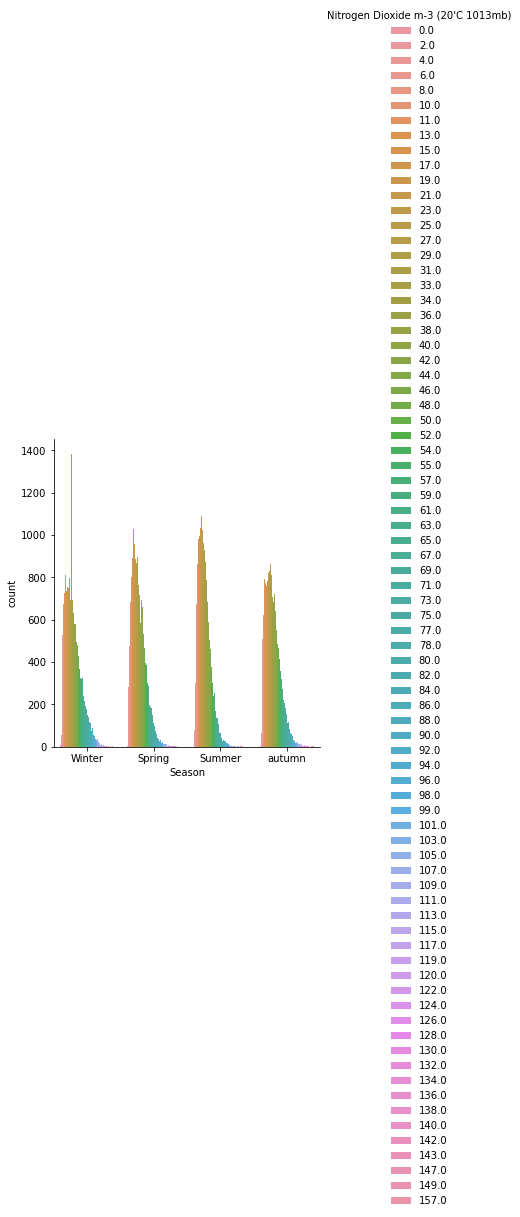

In [108]:
# Countplot
sns.catplot(x ="Season", hue ="Nitrogen Dioxide m-3 (20'C 1013mb)",
kind ="count", data = merged_df)

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [57]:
#merged_df. parse_dates=["Date"], index_col= "Date"

In [58]:
##merged_df ["Nitric Oxide m-3 (20'C 1013mb)"] = merged_df["Nitric Oxide m-3 (20'C 1013mb)"].replace('-', '', regex=True).astype(int)

In [59]:
#merged_df ["Nitrogen Dioxide m-3 (20'C 1013mb)"] = merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"].replace('-', '', regex=True).astype(int)

In [60]:
#merged_df ["Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)"] = merged_df["Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)"].replace('-', '', regex=True).astype(int)

Missing values were handle using interpolation method

Exploratory Data Analysis

In [61]:
merged_df_non_indexed=merged_df.copy()

In [62]:
#Set Date column as index column in order to enhance the querying of data, this is especially helpful when querying data by data ranges
merged_df= merged_df.set_index("Date")

KeyError: "None of ['Date'] are in the columns"

In [63]:
merged_df.index 

DatetimeIndex(['2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01',
               ...
               '2021-12-31', '2021-12-31', '2021-12-31', '2021-12-31',
               '2021-12-31', '2021-12-31', '2021-12-31', '2021-12-31',
               '2021-12-31', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=87672, freq=None)

In [64]:
merged_df.head

<bound method NDFrame.head of             Month  Hour  Nitric Oxide m-3 (20'C 1013mb)  \
Date                                                      
2012-01-01      1     0                             4.0   
2012-01-01      1     1                             4.0   
2012-01-01      1     2                             4.0   
2012-01-01      1     3                             2.0   
2012-01-01      1     4                             1.0   
...           ...   ...                             ...   
2021-12-31     12    19                            11.0   
2021-12-31     12    20                             9.0   
2021-12-31     12    21                             5.0   
2021-12-31     12    22                             2.0   
2021-12-31     12    23                             1.0   

            Nitrogen Dioxide m-3 (20'C 1013mb)  \
Date                                             
2012-01-01                                 8.0   
2012-01-01                                 8.0   
20

## Individual charts for each year

<AxesSubplot:xlabel='Date'>

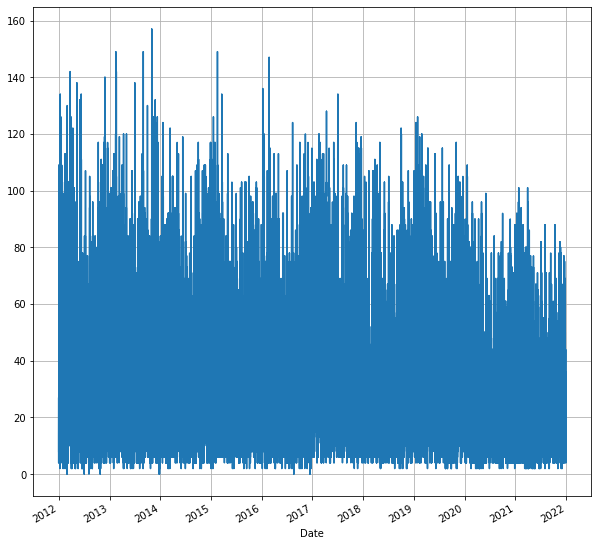

In [65]:
# Extracting the NO2 Data
NO2_Data= merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data.plot(grid=True)

<AxesSubplot:xlabel='Date'>

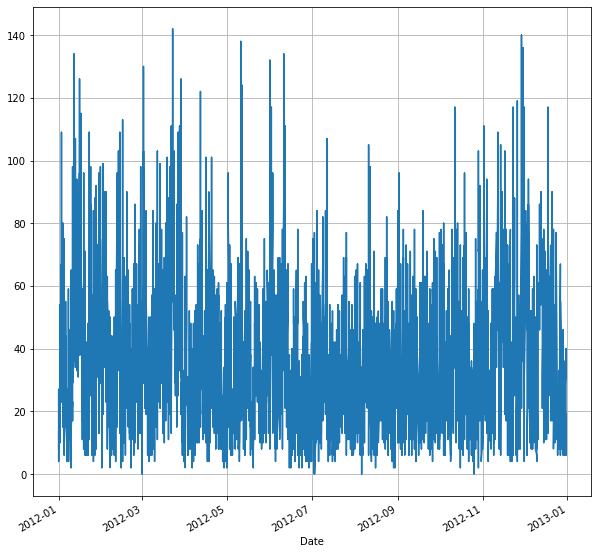

In [66]:
merged_df_2012=merged_df.loc["2012"]
NO2_Data_2012=merged_df_2012["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2012.plot(grid=True)

<AxesSubplot:xlabel='Date'>

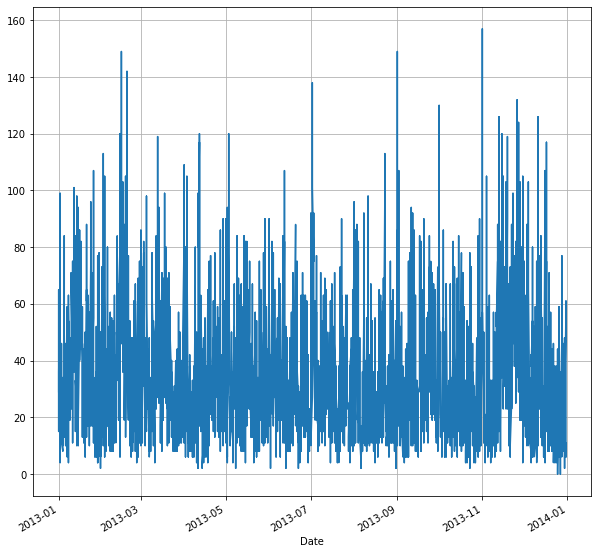

In [67]:
merged_df_2013=merged_df.loc["2013"]
NO2_Data_2013=merged_df_2013["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2013.plot(grid=True)

<AxesSubplot:xlabel='Date'>

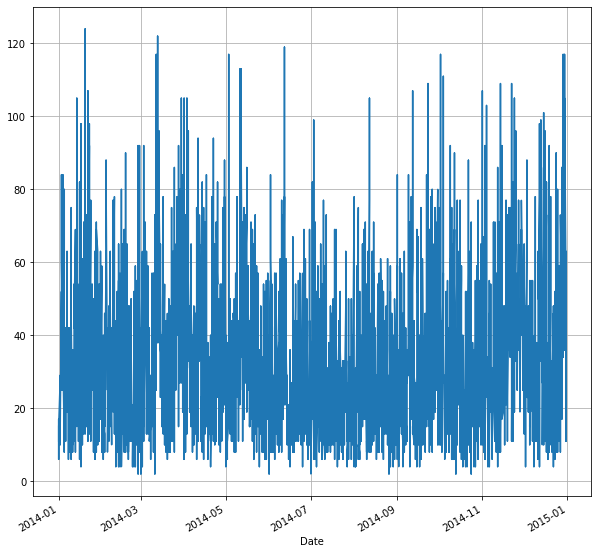

In [68]:
merged_df_2014=merged_df.loc["2014"]
NO2_Data_2014=merged_df_2014["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2014.plot(grid=True)

<AxesSubplot:xlabel='Date'>

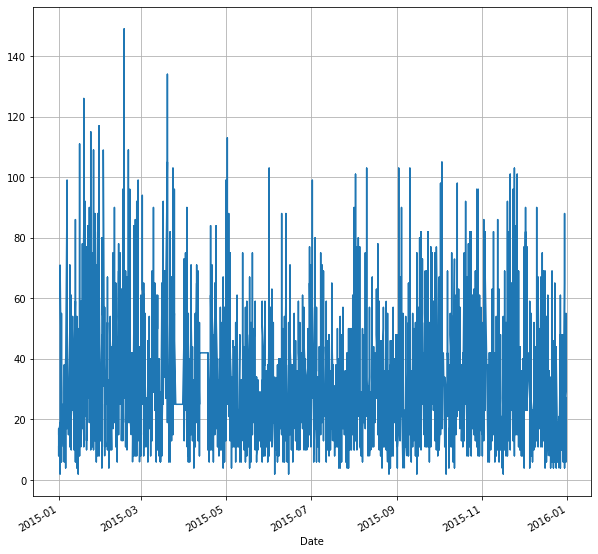

In [69]:
merged_df_2015=merged_df.loc["2015"]
NO2_Data_2015=merged_df_2015["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2015.plot(grid=True)

<AxesSubplot:xlabel='Date'>

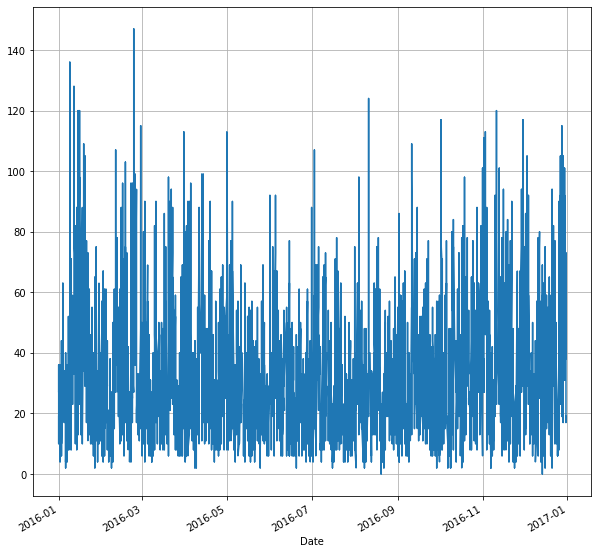

In [70]:
merged_df_2016=merged_df.loc["2016"]
NO2_Data_2016=merged_df_2016["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2016.plot(grid=True)

<AxesSubplot:xlabel='Date'>

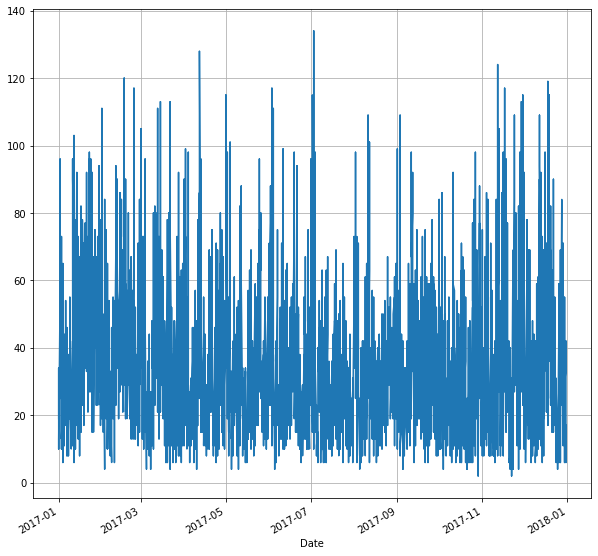

In [71]:
merged_df_2017=merged_df.loc["2017"]
NO2_Data_2017=merged_df_2017["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2017.plot(grid=True)

<AxesSubplot:xlabel='Date'>

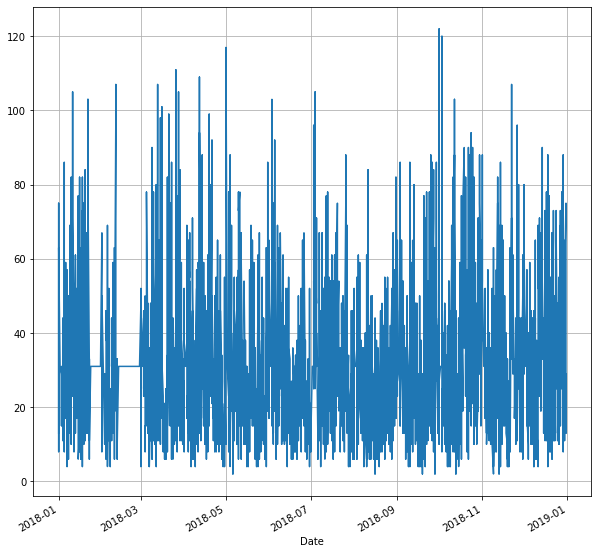

In [72]:
merged_df_2018=merged_df.loc["2018"]
NO2_Data_2018=merged_df_2018["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2018.plot(grid=True)

<AxesSubplot:xlabel='Date'>

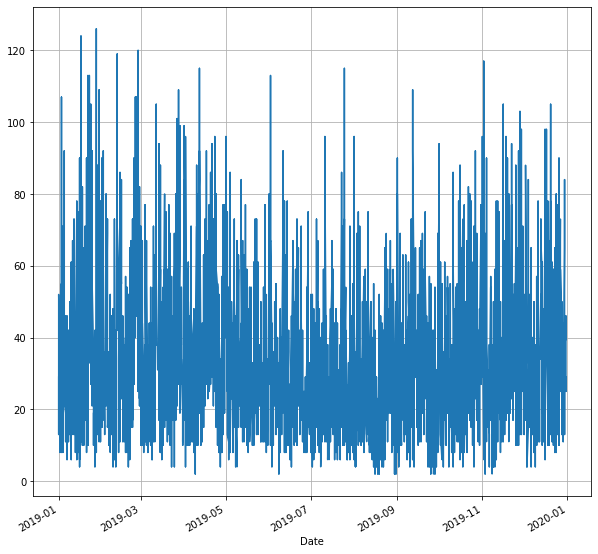

In [73]:
merged_df_2019=merged_df.loc["2019"]
NO2_Data_2019=merged_df_2019["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2019.plot(grid=True)

<AxesSubplot:xlabel='Date'>

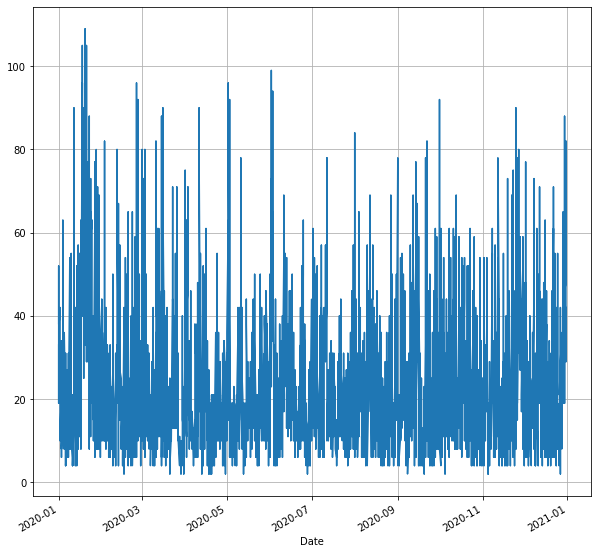

In [74]:
merged_df_2020=merged_df.loc["2020"]
NO2_Data_2020=merged_df_2020["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2020.plot(grid=True)

<AxesSubplot:xlabel='Date'>

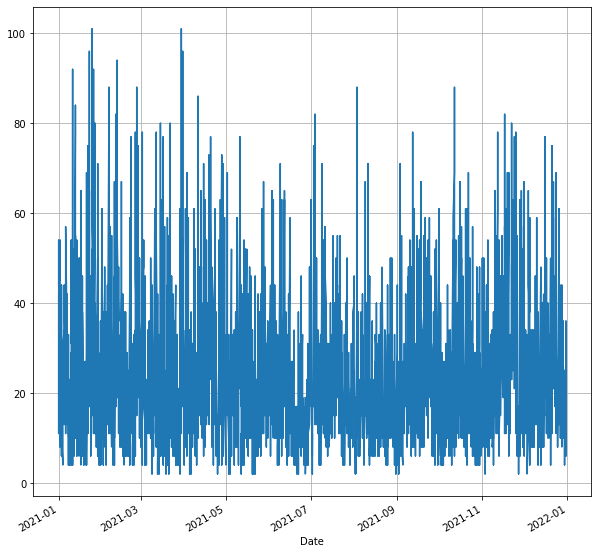

In [75]:
merged_df_2021=merged_df.loc["2021"]
NO2_Data_2021=merged_df_2021["Nitrogen Dioxide m-3 (20'C 1013mb)"]
NO2_Data_2021.plot(grid=True)

## combined charts for each year

Text(0, 0.5, 'NO2')

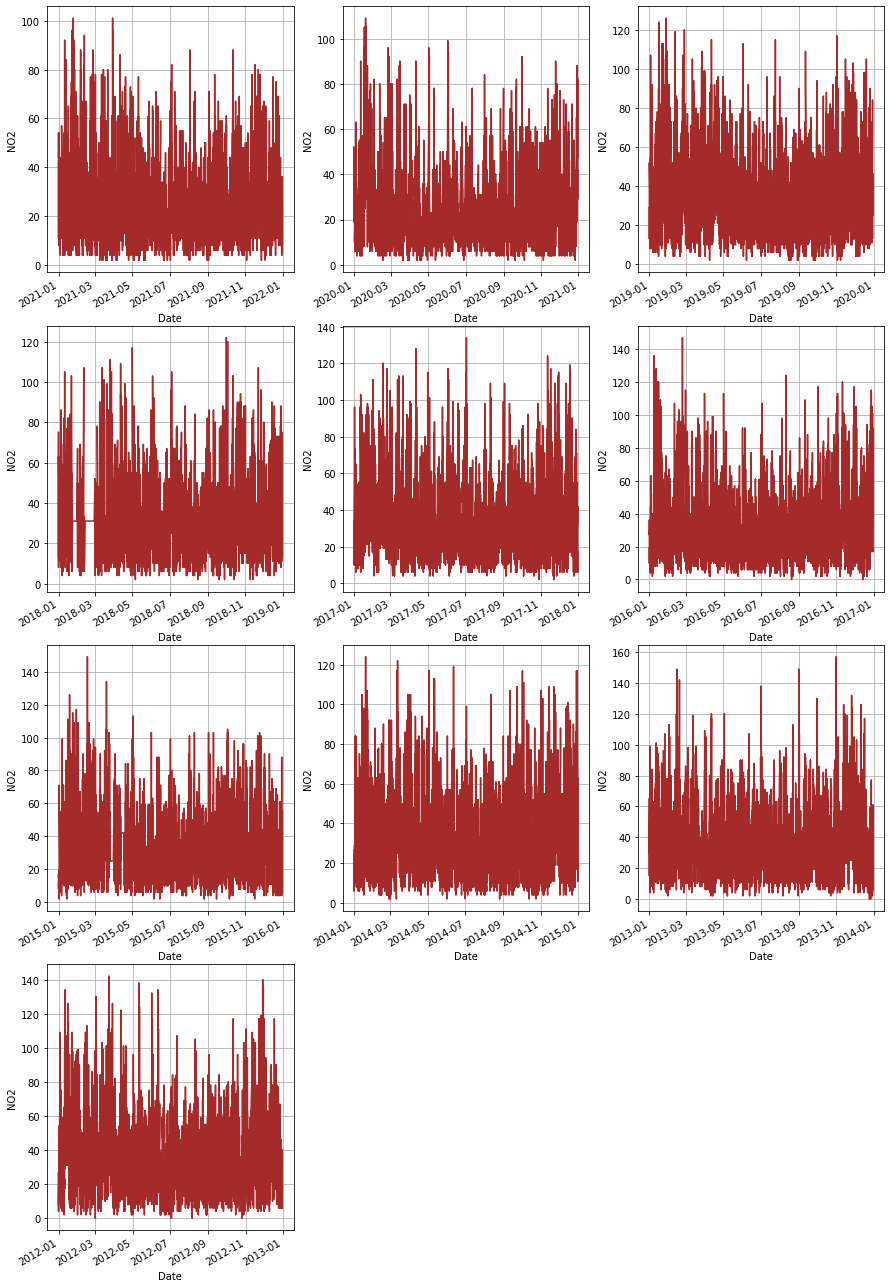

In [76]:
plt.figure(figsize=(15,25))
plt.subplot(4, 3, 1)
NO2_Data_2021.plot(grid=True, color = 'brown')
plt.ylabel('NO2')

plt.subplot(4, 3, 2)
NO2_Data_2020.plot(grid=True, color = 'brown')
plt.ylabel('NO2')

plt.subplot(4, 3, 3)
NO2_Data_2019.plot(grid=True, color = 'brown')
plt.ylabel('NO2')

plt.subplot(4, 3, 4)
NO2_Data_2018.plot(grid=True, color = 'brown')
plt.ylabel('NO2')

plt.subplot(4, 3, 5)
NO2_Data_2017.plot(grid=True, color = 'brown')
plt.ylabel('NO2')

plt.subplot(4, 3, 6)
NO2_Data_2016.plot(grid=True, color = 'brown')
plt.ylabel('NO2')

plt.subplot(4, 3, 7)
NO2_Data_2015.plot(grid=True, color = 'brown')
plt.ylabel('NO2')

plt.subplot(4, 3, 8)
NO2_Data_2014.plot(grid=True,color = 'brown')
plt.ylabel('NO2')

plt.subplot(4, 3, 9)
NO2_Data_2013.plot(grid=True, color = 'brown')
plt.ylabel('NO2')

plt.subplot(4, 3, 10)
NO2_Data_2012.plot(grid=True, color = 'brown')
plt.ylabel('NO2')


## Hide section

In [77]:
# using plotly expressess I created a slider which enable me to visualise specific data points where I observe peaks and dips in the dataset

import plotly.express as px
fig = px.line(merged_df_non_indexed, x="New_Date", y="Nitrogen Dioxide m-3 (20'C 1013mb)", title="Nitrogen Dioxide m-3 (20'C 1013mb) with slider")

fig.update_xaxes(rangeslider_visible=True)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Month', 'Hour', "Nitric Oxide m-3 (20'C 1013mb)", "Nitrogen Dioxide m-3 (20'C 1013mb)", "Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)", "Hourly Mean Nitrogen Dioxide µg m-3 (20'C 1013mb)", 'Date_col', 'newdate', 'Season'] but received: New_Date

## Section

In [78]:
merged_df["2012":"2021"][["Month","Nitrogen Dioxide m-3 (20'C 1013mb)"]].groupby("Month").describe()

Nitrogen Dioxide m-3 (20'C 1013mb)                                   \
                                   count       mean        std  min   25%   
Month                                                                       
1                                 7440.0  37.710753  23.189012  2.0  19.0   
2                                 6792.0  35.368669  21.911929  2.0  19.0   
3                                 7440.0  35.000134  21.332015  0.0  19.0   
4                                 7200.0  32.479306  19.307985  2.0  17.0   
5                                 7440.0  30.252688  17.732622  2.0  17.0   
6                                 7200.0  29.679167  17.672865  2.0  17.0   
7                                 7440.0  29.426478  16.977618  0.0  17.0   
8                                 7440.0  29.565860  16.966981  0.0  17.0   
9                                 7200.0  32.143889  18.328222  2.0  17.0   
10                                7440.0  32.926613  19.836514  0.0  17.0   
11                                7200.0  38.063750  23.396323  2.0  19.0   
12                                7440.0  34.187769  21.409584  0.0  17.0   

                          
        50%   75%    max  
Month                     
1      33.0  52.0  136.0  
2      31.0  46.0  149.0  
3      31.0  48.0  142.0  
4      29.0  44.0  128.0  
5      27.0  40.0  138.0  
6      27.0  40.0  134.0  
7      27.0  40.0  138.0  
8      27.0  40.0  124.0  
9      31.0  44.0  149.0  
10     29.0  44.0  130.0  
11     34.0  52.0  157.0  
12     31.0  48.0  126.0

Bivariate Analysis
The data showed parallels in the emissions of 

Considering the mean values across months for the period under study, there was a decreasing trend from the month of January up till july. In the month of August, a gradual increase can be observed and  this peaked in the month of November and decreased in Decemeber see fig....

array([[<AxesSubplot:title={'center':"Nitrogen Dioxide m-3 (20'C 1013mb)"}>]],
      dtype=object)

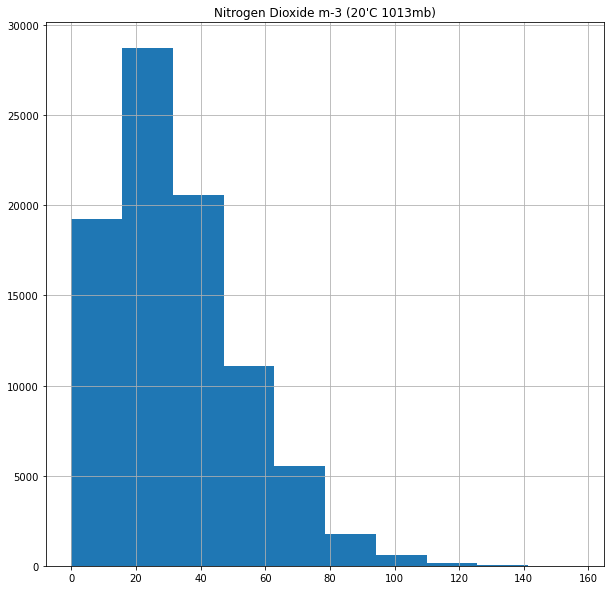

In [79]:
#Showing distribution of NO2 emmissions
merged_df[["Nitrogen Dioxide m-3 (20'C 1013mb)"]].hist()

<AxesSubplot:ylabel='Density'>

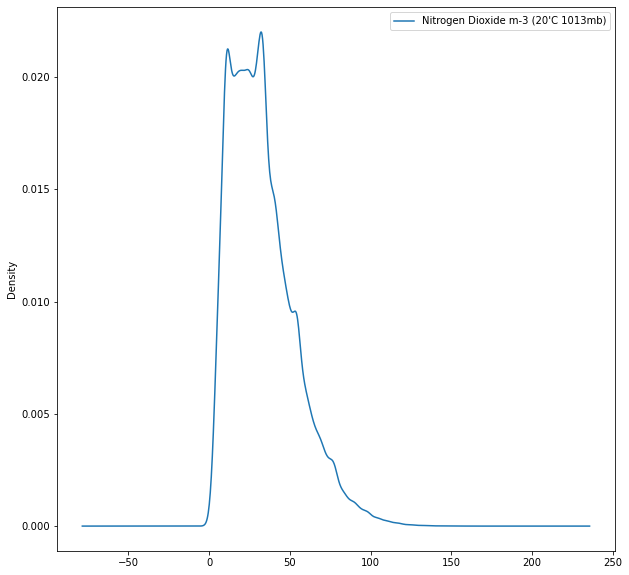

In [80]:
#Density Plot showing Distribution of NO" Hourly data
merged_df[["Nitrogen Dioxide m-3 (20'C 1013mb)"]].plot(kind="density")

In [113]:
merged_df["2012":"2021"][["Month","Nitrogen Dioxide m-3 (20'C 1013mb)"]].groupby("Month").agg({"Nitrogen Dioxide m-3 (20'C 1013mb)":["min","max"]})

Nitrogen Dioxide m-3 (20'C 1013mb)       
                                     min    max
Month                                          
1                                    2.0  136.0
2                                    2.0  149.0
3                                    0.0  142.0
4                                    2.0  128.0
5                                    2.0  138.0
6                                    2.0  134.0
7                                    0.0  138.0
8                                    0.0  124.0
9                                    2.0  149.0
10                                   0.0  130.0
11                                   2.0  157.0
12                                   0.0  126.0

Auto Correlation
The data shows that there is no dynamic increase by the hour. Based on the one hour lag, the data showed a very linear relationship. This was a positive linear relationship. However where a 10 hr, 24hr and 8640hrs (one year) lag period was considered, we could see the NO2 was less linear indicating an increase in the dynamic nature of NO2 emissions at both daily and annual lag periods. This further indicated that NO2 data emissions had weaker positive linear relationships when two consecutive days or years were compared together. Rather the correlation was highest when a single hour was compared with the previous hour.

In [82]:
# the internal correation was further checked in order to understand the internal correlation in order to understand the most 
merged_df_na= merged_df.copy()
merged_df_na= merged_df_na.dropna()


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

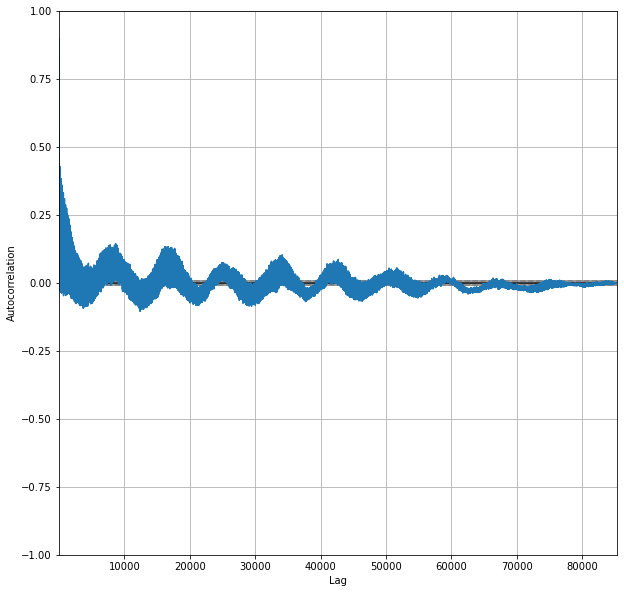

In [83]:
pd.plotting.autocorrelation_plot(merged_df_na["2012":"2021"]["Nitrogen Dioxide m-3 (20\'C 1013mb)"])

The Autocorrelation plots showed peaks at 0, 35, 45 and 75 hours. correlation seemed to be heighest on every 35hrs.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

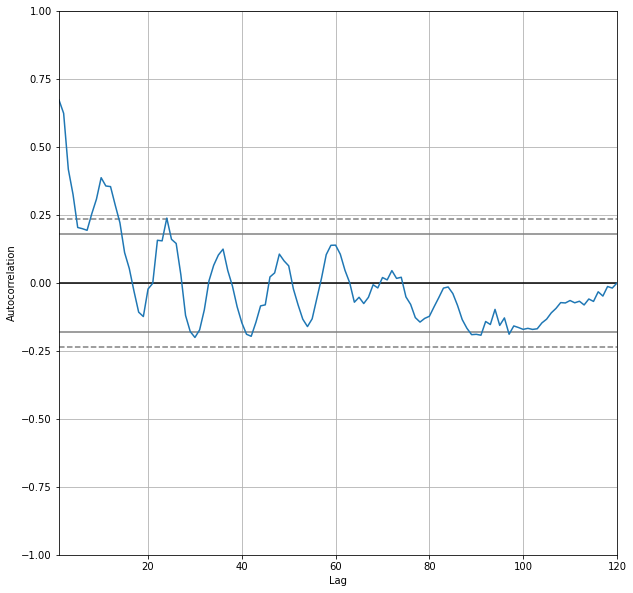

In [84]:
pd.plotting.autocorrelation_plot(merged_df_na["2012":"2021"]["Nitrogen Dioxide m-3 (20\'C 1013mb)"].resample("1m").mean())

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

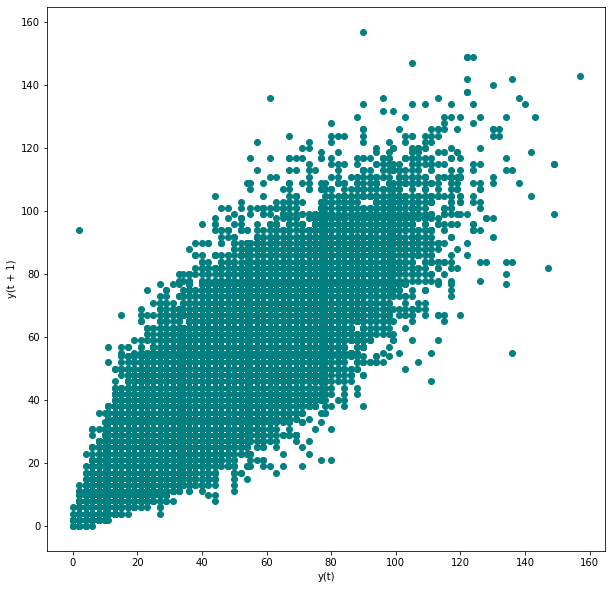

In [85]:
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=1, c='teal')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

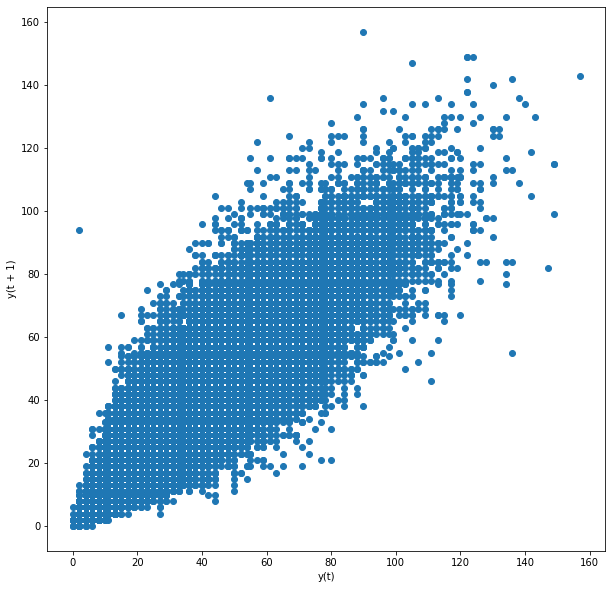

In [86]:
#A lag plot was used to check linearity, randomness and outliers....A first order and 10th order lag plot, X axis was used for time while the y axis represented the lag period which was 1
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=1) 

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

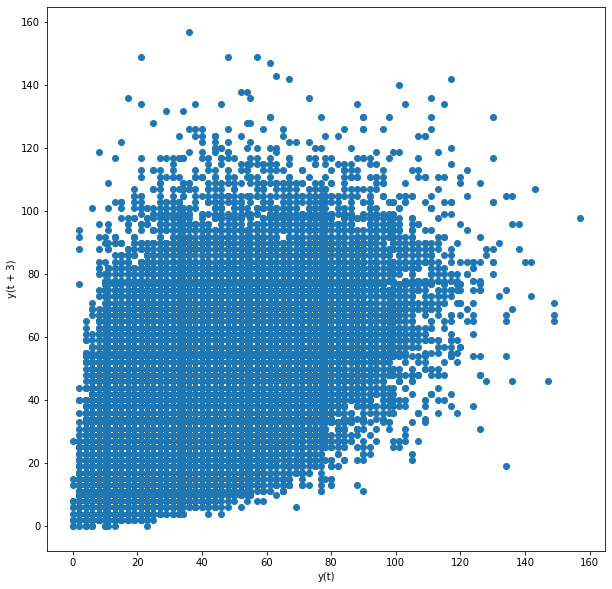

In [87]:
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=3)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 10)'>

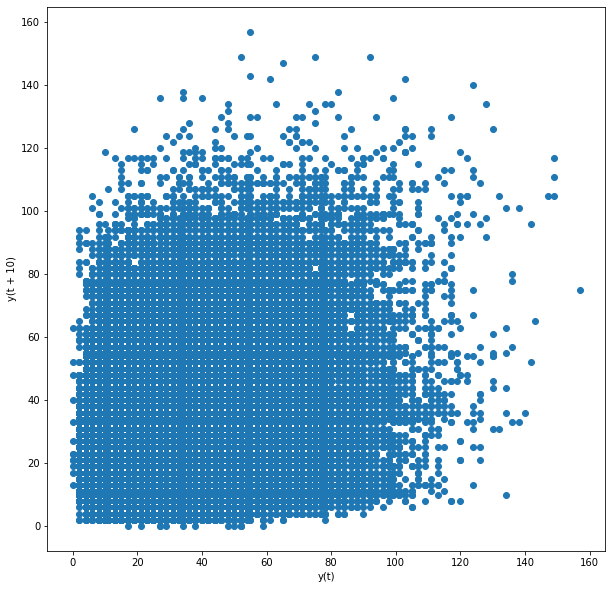

In [88]:
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=10)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

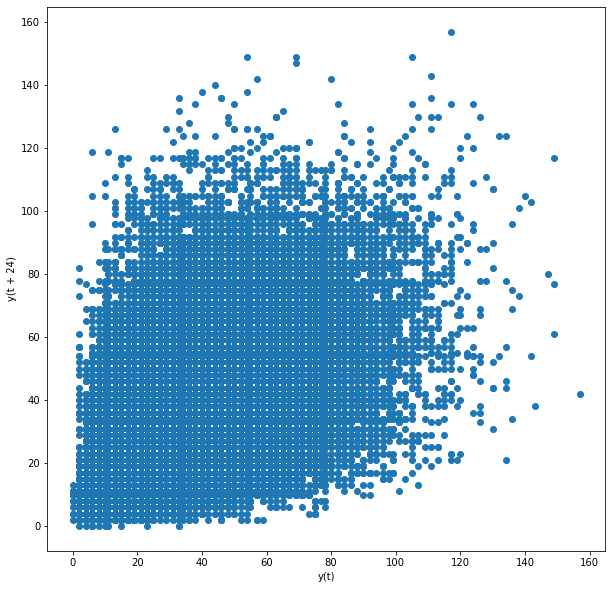

In [89]:
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=24)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 148)'>

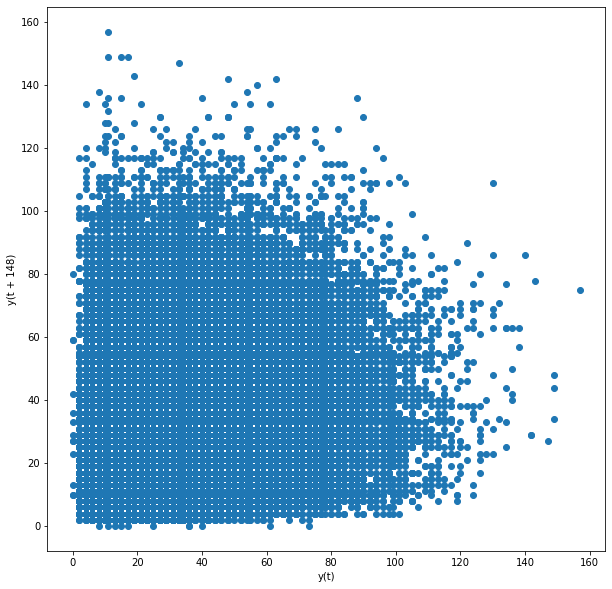

In [90]:
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=148)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 8640)'>

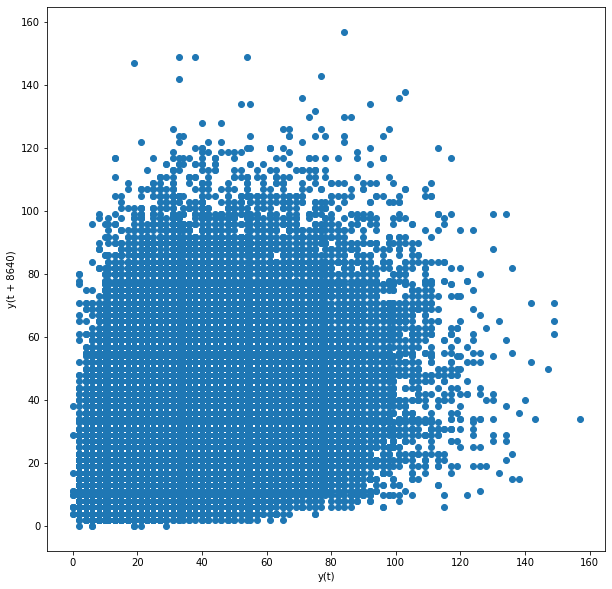

In [91]:
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=8640)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4320)'>

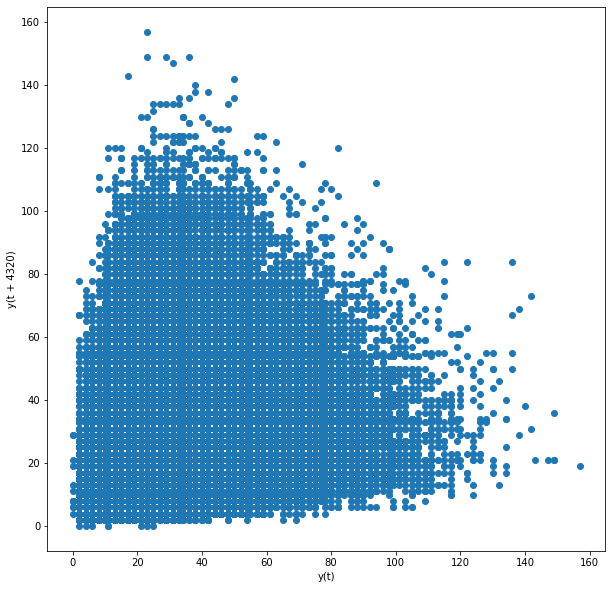

In [92]:
#Auto correlation for a single year
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=4320)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2160)'>

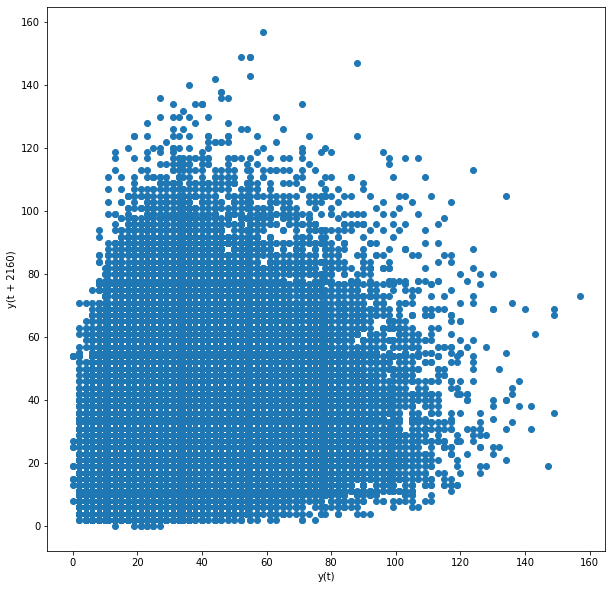

In [93]:
#Auto correlation for 4 months
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=2160)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2150)'>

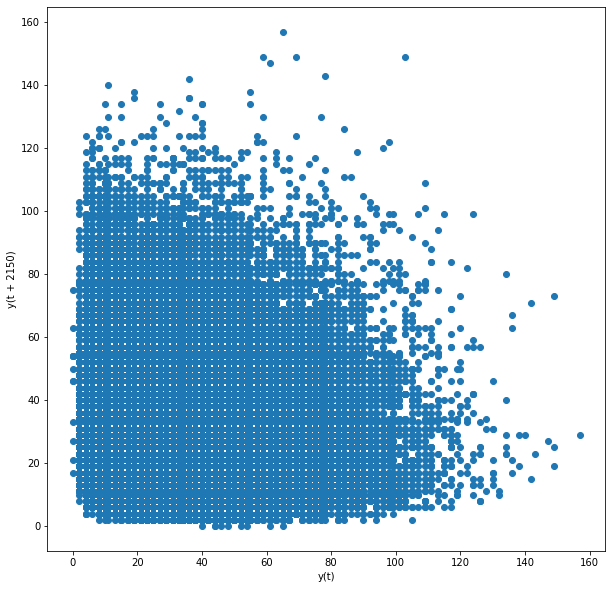

In [94]:
#Auto correlation for 3 months
pd.plotting.lag_plot(merged_df["Nitrogen Dioxide m-3 (20\'C 1013mb)"],lag=2150)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

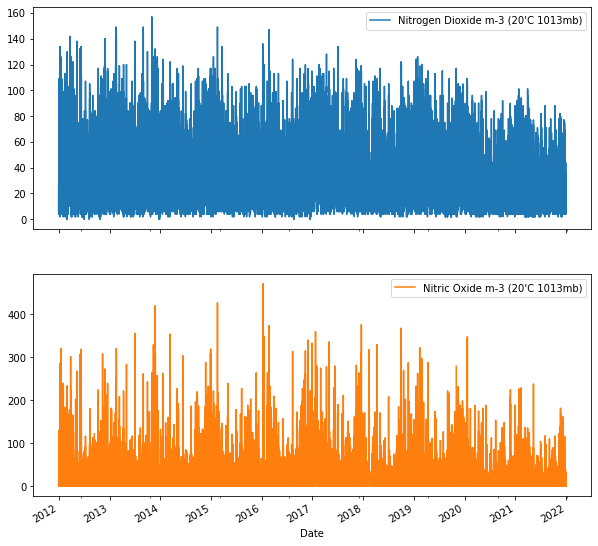

In [95]:
#Multi Data
multidata=merged_df[["Nitrogen Dioxide m-3 (20'C 1013mb)","Nitric Oxide m-3 (20'C 1013mb)"]]
multidata.plot(subplots=True)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

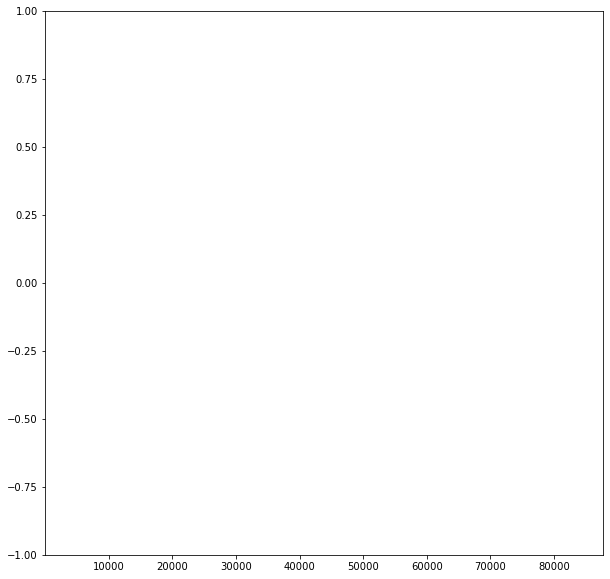

In [96]:
pd.plotting.autocorrelation_plot(merged_df)["2012":"2021"]["Nitrogen Dioxide m-3 (20'C 1013mb)"]

In [ ]:
#merged_df=pd.DataFrame({"Nitrogen Dioxide m-3 (20'C 1013mb)"})
#.Nitrogen Dioxide m-3 (20'C 1013mb) = pd.to_numeric(df1.localHour, errors="coerce")
#merged_df= pd.to_numeric(merged_df."Nitrogen Dioxide m-3 (20'C 1013mb)", errors="coerce")
                       



df1 = pd.DataFrame({"localHour":['9', '12', '17', '16', '22', '19', 
                                 '11', '15', '6', '18', '7', '21',
                                 '13', '20', '23', '10', '14', '8', 
                                 '5', '3', '1', '0', '2', '4', 'null', '-1']})
df1.localHour = pd.to_numeric(df1.localHour, errors="coerce")

df1.localHour.tail()

In [ ]:
merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"].isnull().any()

In [ ]:
merged_df["2012":"2021"][["Nitric Oxide m-3 (20'C 1013mb)", "Nitrogen Dioxide m-3 (20'C 1013mb)"]].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel("Date", fontsize=20);

the data showed a strong correlatio between Nitric Oxide m-3 (20'C 1013mb)	and Nitrogen Dioxide m-3 (20'C 1013mb)	

In [ ]:
merged_df.loc[merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"].between(0, 200), "Hourly Mean Nitrogen Dioxide µg m-3 (20'C 1013mb)"] = "Low"
merged_df.loc[merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"].between(201, 400), "Hourly Mean Nitrogen Dioxide µg m-3 (20'C 1013mb)"] = "Moderate"
merged_df.loc[merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"].between(401, 600), "Hourly Mean Nitrogen Dioxide µg m-3 (20'C 1013mb)"] = "High"
merged_df.loc[merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"] > 601, "Hourly Mean Nitrogen Dioxide µg m-3 (20'C 1013mb)"]="Very High"

Bivariate Analysis
The data showed dispartiies in the Maximum values for by months for the peiod under observation. Maximum values for Nitric Oxide m-3 (20'C 1013mb) were observed in the month of Januaray and this was closely folowed by february and thirdly November. While for Nitrogen Nitrogen Dioxide m-3 (20'C 1013mb)the month with the heighest value was November and this was closely followed by September and February..see figure...

Trend, seasonallity, irregularity. cyclical nature the target variables are NO2, stationarity cyclical nature
Time Series Decomposition: To check for seasonality, trend or cyclical behavior. there was no upwards or downward trend as observed in the chart.The data tends to show some seasonality as peaks were observed at regular intervals.


In [ ]:
plt.rcParams.update({"figure.figsize": (10,6)})
plt.plot(merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"])

Additive decompostion was used to further investigate seasonlity due to the presence of 

In [97]:
#Multiplicative Decomposition
#mul_result = seasonal_decompose(merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"], model="multiplicative", period=1)
# Additive Decomposition
add_result = seasonal_decompose(merged_df["Nitrogen Dioxide m-3 (20'C 1013mb)"], model="additive", period=1)


The first chart showed the actual time series, the second shoewed the trend. The data showed very little seasonality of less than 0.01 and same as the residual o.o1

Text(0.5, 0.98, '\nAdditive Decompose')

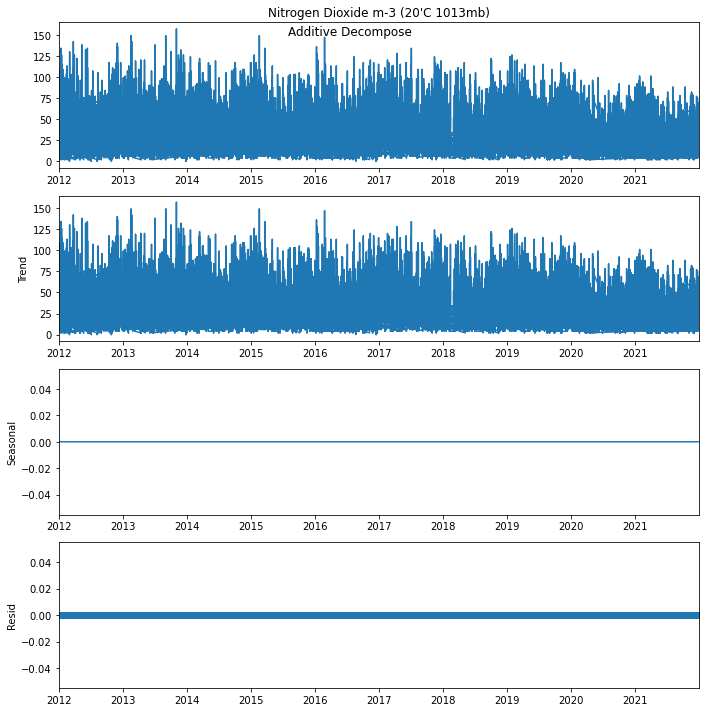

In [98]:
#Plotting Additive Time Series
plt.rcParams.update({"figure.figsize": (10,10)})
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)

The Actual NO" values remained the same as the trend values as there was no seasonlity in the data neither was there any residual.

In [99]:
#To see the additive decomostion in a tabular format
merged_df_add= pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
merged_df_add.columns=["seasonality", "trend", "residual", "Nitrogen Dioxide m-3 (20'C 1013mb)"]
merged_df_add.head(5)

,seasonality,trend,residual,Nitrogen Dioxide m-3 (20'C 1013mb)
Date,,,,
2012-01-01,0.0,8.0,0.0,8.0
2012-01-01,0.0,8.0,0.0,8.0
2012-01-01,0.0,8.0,0.0,8.0
2012-01-01,0.0,6.0,0.0,6.0
2012-01-01,0.0,6.0,0.0,6.0


#To investigate for stationarity of time series data.



In [100]:
#Testing null hypothesis and checking for stationarity
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(merged_df ["Nitrogen Dioxide m-3 (20'C 1013mb)"].values, autolag="AIC")
print (f'ADF Statistic: {adfuller_result[0]}')
print (f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
 
    print('Critial Values:')
    print(f"   {key}, {value}")

ADF Statistic: -21.453633731097526
p-value: 0.0
Critial Values:
   1%, -3.4304246474701263
Critial Values:
   5%, -2.8615729929608564
Critial Values:
   10%, -2.566787561007527


In [101]:
#summer months versus winter months
#weekdays versus weekends

In [ ]:
#Autoregressive movving average

In [114]:
#Time series Forecasting
pip install pmdarima

SyntaxError: invalid syntax (4036752402.py, line 2)

In [ ]:
#using Arima, LSTM, EXGBOOST, Prophet to predict maximum temperatures
#calculate exceedances of 40m ug m3 per hour
#Seasons versus exceedances (show correlation on heat map or violin plot)